In [1]:
# Import libraries
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

/home/tek2991/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Import data from excel files
df1 = pd.read_excel('Formative Assessment -III_class_LKG.xlsx');
df2 = pd.read_excel('Formative Assessment -4_class_LKG.xlsx');
df3 = pd.read_excel('Anuual Exam 2024_class_LKG.xlsx');

# In df3, where the Full Mark is not 50, multuply the Full Mark, Pass Mark and Marks Secured by 50/Full Mark
df3.loc[df3['Full Mark']!=50, 'Pass Mark'] = df3['Pass Mark']*50/df3['Full Mark'];
df3.loc[df3['Full Mark']!=50, 'Marks Secured'] = df3['Marks Secured']*50/df3['Full Mark'];
df3.loc[df3['Full Mark']!=50, 'Full Mark'] = df3['Full Mark']*50/df3['Full Mark'];

# In df2 and df1, where the Full Mark is not 25, multuply the Full Mark, Pass Mark and Marks Secured by 25/Full Mark
df2.loc[df2['Full Mark']!=25, 'Pass Mark'] = df2['Pass Mark']*25/df2['Full Mark'];
df2.loc[df2['Full Mark']!=25, 'Marks Secured'] = df2['Marks Secured']*25/df2['Full Mark'];
df2.loc[df2['Full Mark']!=25, 'Full Mark'] = df2['Full Mark']*25/df2['Full Mark'];

df1.loc[df1['Full Mark']!=25, 'Pass Mark'] = df1['Pass Mark']*25/df1['Full Mark'];
df1.loc[df1['Full Mark']!=25, 'Marks Secured'] = df1['Marks Secured']*25/df1['Full Mark'];
df1.loc[df1['Full Mark']!=25, 'Full Mark'] = df1['Full Mark']*25/df1['Full Mark'];

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True);

# print the head
df.head()

,Academic session,Exam Name,Exam Mode,Subject Name,Subject Status,Full Mark,Pass Mark,Negative Percentage,Student Name,Class,Section,Roll No,Marks Secured,Result
0,2023-2024,Formative Assessment -III,Offline,Rhymes,Evaluating,25,7.0,0 %,Nityam Kumar,LKG,A,1,25.0,Pass
1,2023-2024,Formative Assessment -III,Offline,Oral English,Evaluating,25,7.5,0 %,Nityam Kumar,LKG,A,1,25.0,Pass
2,2023-2024,Formative Assessment -III,Offline,Oral Maths,Evaluating,25,7.5,0 %,Nityam Kumar,LKG,A,1,25.0,Pass
3,2023-2024,Formative Assessment -III,Offline,English,Evaluating,25,7.0,0 %,Nityam Kumar,LKG,A,1,25.0,Pass
4,2023-2024,Formative Assessment -III,Offline,Maths,Evaluating,25,7.0,0 %,Nityam Kumar,LKG,A,1,25.0,Pass


In [3]:
# Print the number of cells with value 0 in marks secured column
print('Number of cells with value 0 in marks secured column: ', df[df['Marks Secured']==0].shape[0])

# Print the student names with value 0 in marks secured column
print('Student names with value 0 in marks secured column: ', df[df['Marks Secured']==0]['Student Name'].unique())

Number of cells with value 0 in marks secured column:  30
Student names with value 0 in marks secured column:  ['Anshu kumari' 'Ayush Talukdar' 'Shristi Chetri']


In [4]:
# Get all the Subject names
subjects = df['Subject Name'].unique();

# Get all the students
students = df['Student Name'].unique();

# Get all the Exam names
exams = df['Exam Name'].unique();

In [5]:
# print the number of subjects
print('Number of Subjects: ', len(subjects));
# Print the subjects
print('Subjects: ', subjects);
# print the number of students
print('Number of Students: ', len(students));

# print the number of exams
print('Number of Exams: ', len(exams));

Number of Subjects:  6
Subjects:  ['Rhymes' 'Oral English' 'Oral Maths' 'English' 'Maths' 'Drawing']
Number of Students:  26
Number of Exams:  3


In [6]:
# Create a new dataframe for students data
df_new = pd.DataFrame(students, columns=['Student Name']);

# Loop through all the students
for student in students:
    # Find the first row of the student in the dataframe
    row = df.loc[df['Student Name'] == student].iloc[0];
    # Add the Class, Section, Roll No to the new dataframe
    df_new.loc[df_new['Student Name'] == student, 'Class'] = row['Class'];
    df_new.loc[df_new['Student Name'] == student, 'Section'] = row['Section'];
    df_new.loc[df_new['Student Name'] == student, 'Roll No'] = row['Roll No'];

df_new.head()

,Student Name,Class,Section,Roll No
0,Nityam Kumar,LKG,A,1.0
1,Abhik Upadhya,LKG,A,2.0
2,Pratisha Chetri,LKG,A,2.0
3,Ankita Sharki,LKG,A,3.0
4,Ayush Talukdar,LKG,A,4.0


In [7]:
# Add columns for each exam and subject
for exam in exams:
    for subject in subjects:
        df_new[exam + '_' + subject] = 0;
        df_new[exam + '_' + subject + '_total'] = 0;
        df_new[exam + '_' + subject + '_pass'] = 0;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment -III_Rhymes,Formative Assessment -III_Rhymes_total,Formative Assessment -III_Rhymes_pass,Formative Assessment -III_Oral English,Formative Assessment -III_Oral English_total,Formative Assessment -III_Oral English_pass,...,Anuual Exam 2024_Oral Maths_pass,Anuual Exam 2024_English,Anuual Exam 2024_English_total,Anuual Exam 2024_English_pass,Anuual Exam 2024_Maths,Anuual Exam 2024_Maths_total,Anuual Exam 2024_Maths_pass,Anuual Exam 2024_Drawing,Anuual Exam 2024_Drawing_total,Anuual Exam 2024_Drawing_pass
0,Nityam Kumar,LKG,A,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abhik Upadhya,LKG,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pratisha Chetri,LKG,A,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ankita Sharki,LKG,A,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ayush Talukdar,LKG,A,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Add marks to the new dataframe
for student in students:
    for exam in exams:
        for subject in subjects:
            # full marks
            full_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Full Mark'].iloc[0];
            # pass marks
            pass_mark = df.loc[(df['Exam Name'] == exam) & (df['Subject Name'] == subject), 'Pass Mark'].iloc[0];
            # Check if the row of the student is in the dataframe
            if df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].empty:
                # If it doesn't exist, add 0 to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = 0;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
            else:
                # If it exists, get the row
                row = df.loc[(df['Student Name'] == student) & (df['Exam Name'] == exam) & (df['Subject Name'] == subject)].iloc[0];
                # Add the marks to the new dataframe
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject] = row['Marks Secured'];
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_total'] = full_mark;
                df_new.loc[df_new['Student Name'] == student, exam + '_' + subject + '_pass'] = pass_mark;
df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment -III_Rhymes,Formative Assessment -III_Rhymes_total,Formative Assessment -III_Rhymes_pass,Formative Assessment -III_Oral English,Formative Assessment -III_Oral English_total,Formative Assessment -III_Oral English_pass,...,Anuual Exam 2024_Oral Maths_pass,Anuual Exam 2024_English,Anuual Exam 2024_English_total,Anuual Exam 2024_English_pass,Anuual Exam 2024_Maths,Anuual Exam 2024_Maths_total,Anuual Exam 2024_Maths_pass,Anuual Exam 2024_Drawing,Anuual Exam 2024_Drawing_total,Anuual Exam 2024_Drawing_pass
0,Nityam Kumar,LKG,A,1.0,25,25,7,25.0,25,7.5,...,15,50.0,50,15,45.0,50,15,38,50,15
1,Abhik Upadhya,LKG,A,2.0,25,25,7,25.0,25,7.5,...,15,37.0,50,15,42.0,50,15,44,50,15
2,Pratisha Chetri,LKG,A,2.0,10,25,7,25.0,25,7.5,...,15,13.0,50,15,26.0,50,15,37,50,15
3,Ankita Sharki,LKG,A,3.0,25,25,7,25.0,25,7.5,...,15,49.0,50,15,48.0,50,15,40,50,15
4,Ayush Talukdar,LKG,A,4.0,12,25,7,25.0,25,7.5,...,15,47.0,50,15,45.0,50,15,42,50,15


In [9]:
# Add weightage column for each subject
for subject in subjects:
    df_new['Weightage ' + subject] = np.nan;

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment -III_Rhymes,Formative Assessment -III_Rhymes_total,Formative Assessment -III_Rhymes_pass,Formative Assessment -III_Oral English,Formative Assessment -III_Oral English_total,Formative Assessment -III_Oral English_pass,...,Anuual Exam 2024_Maths_pass,Anuual Exam 2024_Drawing,Anuual Exam 2024_Drawing_total,Anuual Exam 2024_Drawing_pass,Weightage Rhymes,Weightage Oral English,Weightage Oral Maths,Weightage English,Weightage Maths,Weightage Drawing
0,Nityam Kumar,LKG,A,1.0,25,25,7,25.0,25,7.5,...,15,38,50,15,NaN,NaN,NaN,NaN,NaN,NaN
1,Abhik Upadhya,LKG,A,2.0,25,25,7,25.0,25,7.5,...,15,44,50,15,NaN,NaN,NaN,NaN,NaN,NaN
2,Pratisha Chetri,LKG,A,2.0,10,25,7,25.0,25,7.5,...,15,37,50,15,NaN,NaN,NaN,NaN,NaN,NaN
3,Ankita Sharki,LKG,A,3.0,25,25,7,25.0,25,7.5,...,15,40,50,15,NaN,NaN,NaN,NaN,NaN,NaN
4,Ayush Talukdar,LKG,A,4.0,12,25,7,25.0,25,7.5,...,15,42,50,15,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Calculate the weightage for each subject by taking the 100% from FA3, 100% from FA4 and 100% from Annual
for subject in subjects:
    df_new['Weightage ' + subject] = round(df_new['Formative Assessment -III_' + subject] * 1.0 + df_new['Formative Assessment -4_' + subject] * 1.0 + df_new['Anuual Exam 2024_' + subject] * 1.0, 2);
    # Calculate the full weightage for each subject by taking the 100% from FA3, 100% from FA4 and 100% from Annual
    df_new['Weightage ' + subject + ' total'] = df_new['Formative Assessment -III_' + subject + '_total'] * 1.0 + df_new['Formative Assessment -4_' + subject + '_total'] * 1.0 + df_new['Anuual Exam 2024_' + subject + '_total'] * 1.0;

In [12]:
# Calculate the weightage result for each subject, pass if weightage is greater than 30% of the full weightage
for subject in subjects:
    # calculate the weightage result
    df_new['Result ' + subject] = np.where(df_new['Weightage ' + subject] >= df_new['Weightage ' + subject + ' total'] * 0.3, 'Pass', 'Fail');

In [13]:
# Add a total column for the weightage
df_new['Total Weightage'] = 0;

# Calculate the total weightage using a loop of all the subjects
for subject in subjects:
    df_new['Total Weightage'] += df_new['Weightage ' + subject];

df_new.head()

,Student Name,Class,Section,Roll No,Formative Assessment -III_Rhymes,Formative Assessment -III_Rhymes_total,Formative Assessment -III_Rhymes_pass,Formative Assessment -III_Oral English,Formative Assessment -III_Oral English_total,Formative Assessment -III_Oral English_pass,...,Weightage English total,Weightage Maths total,Weightage Drawing total,Result Rhymes,Result Oral English,Result Oral Maths,Result English,Result Maths,Result Drawing,Total Weightage
0,Nityam Kumar,LKG,A,1.0,25,25,7,25.0,25,7.5,...,100.0,100.0,100.0,Pass,Pass,Pass,Pass,Pass,Pass,575.00
1,Abhik Upadhya,LKG,A,2.0,25,25,7,25.0,25,7.5,...,100.0,100.0,100.0,Pass,Pass,Pass,Pass,Pass,Pass,531.67
2,Pratisha Chetri,LKG,A,2.0,10,25,7,25.0,25,7.5,...,100.0,100.0,100.0,Pass,Pass,Pass,Pass,Pass,Pass,394.33
3,Ankita Sharki,LKG,A,3.0,25,25,7,25.0,25,7.5,...,100.0,100.0,100.0,Pass,Pass,Pass,Pass,Pass,Pass,561.84
4,Ayush Talukdar,LKG,A,4.0,12,25,7,25.0,25,7.5,...,100.0,100.0,100.0,Pass,Pass,Pass,Pass,Pass,Pass,414.83


In [14]:
# Add a result column
df_new['Result'] = '';

# Function to add all weightage subject total
def add_total_weightage(row):
    total = 0;
    for subject in subjects:
        total += row['Weightage ' + subject + ' total'];
    return total;


# Add the total marks column
df_new['Total Marks'] = df_new.apply(add_total_weightage, axis=1);

# Calculate the percentage
df_new['Percentage'] = df_new['Total Weightage'] / df_new['Total Marks'] * 100;

# Pass if total weightage is greater than 30% of total full marks
df_new.loc[df_new['Total Weightage'] >= df_new['Total Marks'] * 0.3, 'Result'] = 'Pass';

# Fail if total weightage is less than 30% of total full marks
df_new.loc[df_new['Total Weightage'] < df_new['Total Marks'] * 0.3, 'Result'] = 'Fail';

In [15]:
# Calculate the rank
df_new['Rank'] = df_new['Percentage'].rank(ascending=False, method='min');

In [16]:
# Print the first row
df_new.iloc[0]

Student Name                        Nityam Kumar
Class                                        LKG
Section                                        A
Roll No                                      1.0
Formative Assessment -III_Rhymes              25
                                        ...     
Total Weightage                            575.0
Result                                      Pass
Total Marks                                600.0
Percentage                             95.833333
Rank                                         1.0
Name: 0, Length: 81, dtype: object

In [17]:
df_new

,Student Name,Class,Section,Roll No,Formative Assessment -III_Rhymes,Formative Assessment -III_Rhymes_total,Formative Assessment -III_Rhymes_pass,Formative Assessment -III_Oral English,Formative Assessment -III_Oral English_total,Formative Assessment -III_Oral English_pass,...,Result Oral English,Result Oral Maths,Result English,Result Maths,Result Drawing,Total Weightage,Result,Total Marks,Percentage,Rank
0,Nityam Kumar,LKG,A,1.0,25,25,7,25.0,25,7.5,...,Pass,Pass,Pass,Pass,Pass,575.00,Pass,600.0,95.833333,1.0
1,Abhik Upadhya,LKG,A,2.0,25,25,7,25.0,25,7.5,...,Pass,Pass,Pass,Pass,Pass,531.67,Pass,600.0,88.611667,7.0
2,Pratisha Chetri,LKG,A,2.0,10,25,7,25.0,25,7.5,...,Pass,Pass,Pass,Pass,Pass,394.33,Pass,600.0,65.721667,20.0
3,Ankita Sharki,LKG,A,3.0,25,25,7,25.0,25,7.5,...,Pass,Pass,Pass,Pass,Pass,561.84,Pass,600.0,93.640000,2.0
4,Ayush Talukdar,LKG,A,4.0,12,25,7,25.0,25,7.5,...,Pass,Pass,Pass,Pass,Pass,414.83,Pass,600.0,69.138333,19.0
5,Priyanshi Banik,LKG,A,4.0,25,25,7,25.0,25,7.5,...,Pass,Pass,Pass,Pass,Pass,518.34,Pass,600.0,86.390000,10.0
6,Bheemank Sharma,LKG,A,5.0,25,25,7,25.0,25,7.5,...,Pass,Pass,Pass,Pass,Pass,554.66,Pass,600.0,92.443333,4.0
7,Hardik Rout,LKG,A,7.0,25,25,7,25.0,25,7.5,...,Pass,Pass,Pass,Pass,Pass,556.16,Pass,600.0,92.693333,3.0
8,Dhruv Talukdar,LKG,A,8.0,25,25,7,25.0,25,7.5,...,Pass,Pass,Pass,Pass,Pass,440.50,Pass,600.0,73.416667,16.0
9,Sneha Dey,LKG,A,9.0,25,25,7,15.0,25,7.5,...,Pass,Pass,Pass,Pass,Pass,529.33,Pass,600.0,88.221667,9.0


In [18]:
# Export the dataframe to excel
df_new.to_excel('Result_Final.xlsx', index=False);

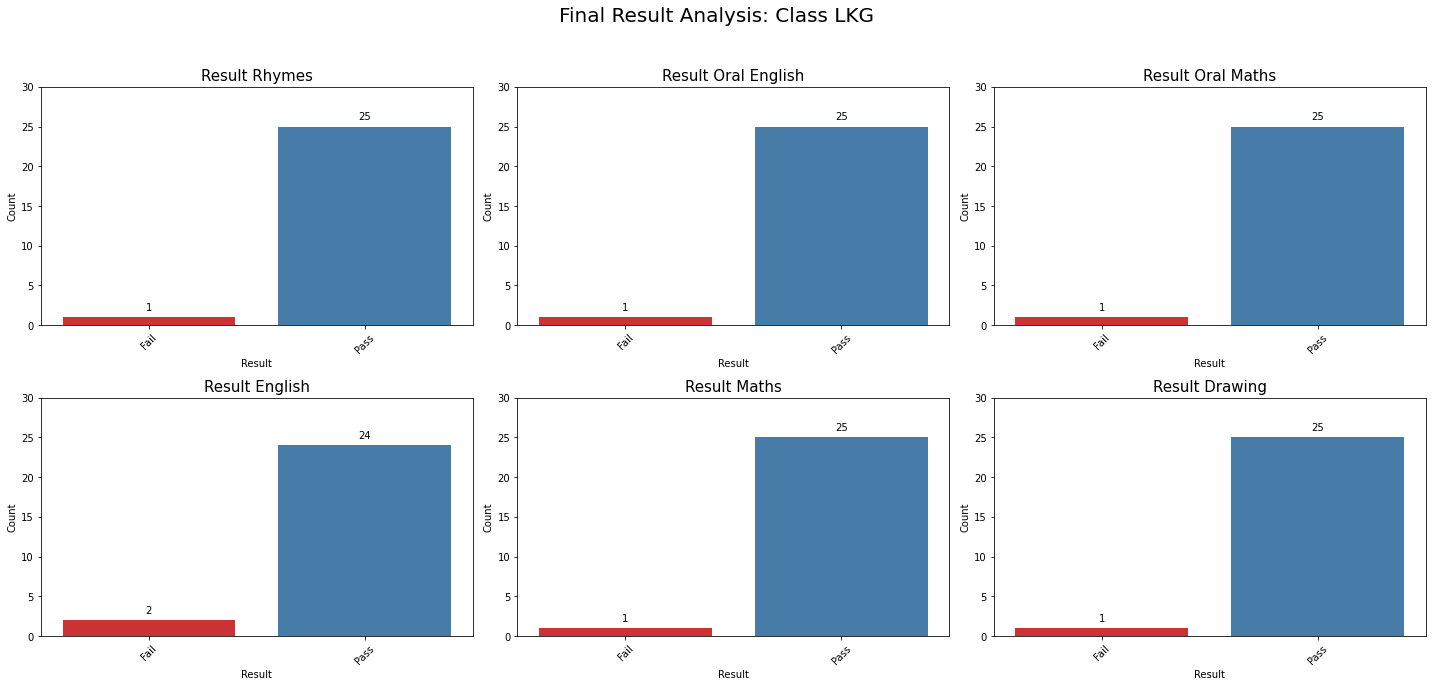

In [40]:
# Combine the charts in one figure
fig, axes = plt.subplots(2, 3, figsize=(20, 10));

# Set the title of the figure
fig.suptitle('Final Result Analysis: Class LKG', fontsize=20);

for i, subject in enumerate(subjects):
    sns.countplot(x='Result ' + subject, data=df_new, palette='Set1', order=['Fail', 'Pass'], ax=axes[i // 3, i % 3]);
    axes[i // 3, i % 3].set_title('Result ' + subject, fontsize=15);
    axes[i // 3, i % 3].set_xlabel('Result', fontsize=10);
    axes[i // 3, i % 3].set_ylabel('Count', fontsize=10);
    axes[i // 3, i % 3].tick_params(labelsize=10);
    axes[i // 3, i % 3].set_xticklabels(axes[i // 3, i % 3].get_xticklabels(), rotation=45);
    # Add top padding
    axes[i // 3, i % 3].set_ylim([0, 30]);

    # Add the count on top of the bars
    for p in axes[i // 3, i % 3].patches:
        axes[i // 3, i % 3].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points');
    
# Add large gap between rows
plt.tight_layout(rect=[0, 0.03, 1, 0.95]);
plt.show();

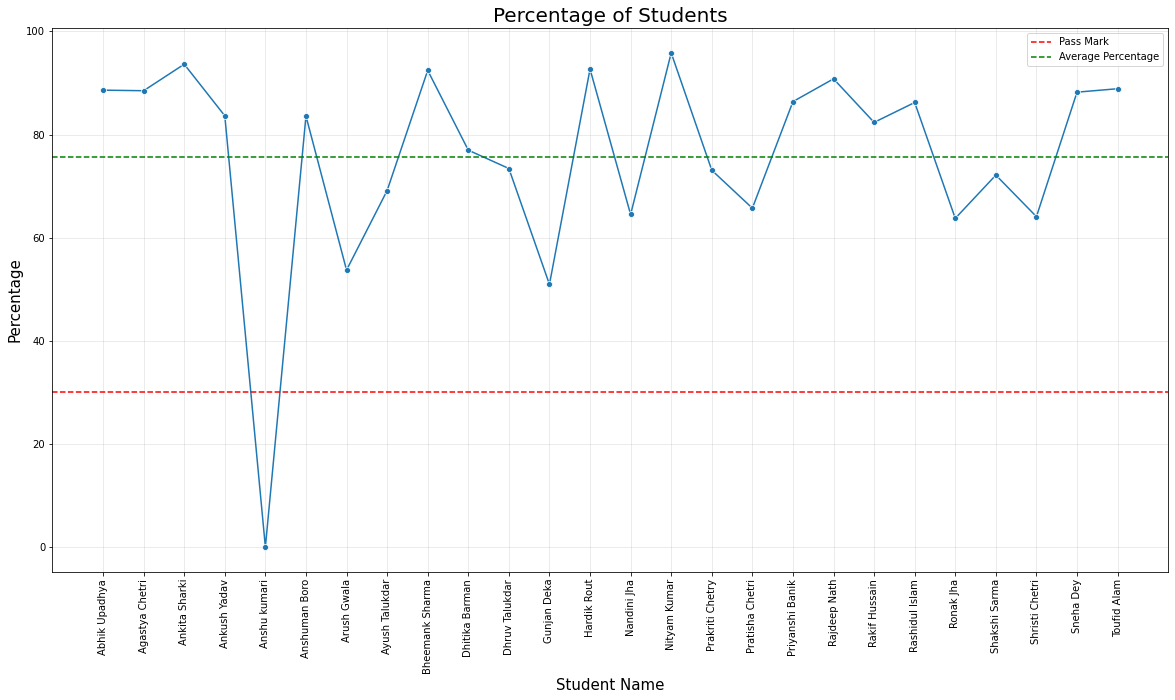

In [85]:
# A line plot with student names on x-axis and percentage on y-axis.
# Ordered by rank
# Add a horizontal line at 30% to show the pass mark
# Add a horizontal line to show the average percentage
# Points with percentage less than 30% are red and points with percentage greater than 30% are green

plt.figure(figsize=(20, 10));
sns.lineplot(x='Student Name', y='Percentage', data=df_new.sort_values('Student Name'), marker='o');
plt.axhline(y=30, color='r', linestyle='--', label='Pass Mark');
plt.axhline(y=df_new['Percentage'].mean(), color='g', linestyle='--', label='Average Percentage');
plt.title('Percentage of Students', fontsize=20);
plt.xlabel('Student Name', fontsize=15);
plt.ylabel('Percentage', fontsize=15);
plt.xticks(rotation=90);
plt.legend();

# Add transparant grid lines at every 10% on y-axis
plt.grid(alpha=0.3);

plt.show();
